<a href="https://colab.research.google.com/github/klstak/NutriGie/blob/master/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Specify the file path
file_path = '/content/drive/MyDrive/capstone/ML/data_kuesioner.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

In [ ]:
df

,timestamp,usia,jenis_kelamin,tinggi_badan,berat_badan,aktivitas_fisik,pekerjaan,sarapan_makanan_1,sarapan_makanan_2,sarapan_makanan_3,...,snack_renyah,snack_halus,snack_creamy,snack_kental,snack_digoreng,snack_direbus,snack_dibakar,snack_dikukus,snack_cepat_saji,snack_beli
0,20/05/2023 21:18:27,21,Perempuan,154,55,Ringan,Mahasiswa,20,20,129,...,8,5,3,2,9,6,2,4,Ya,Ya
1,20/05/2023 21:44:42,22,Laki-laki,170,53,Ringan,Mahasiswa,126,40,52,...,8,4,1,1,8,1,1,9,Tidak,Ya
2,20/05/2023 22:06:07,20,Perempuan,158,56,Ringan,Mahasiswa,120,104,94,...,7,4,3,3,6,5,4,5,Ya,Ya
3,20/05/2023 22:24:38,20,Perempuan,155,44,Ringan,mahasiswa,163,17,131,...,10,1,1,1,5,4,1,5,Tidak,Ya
4,20/05/2023 23:42:32,20,Perempuan,158,40,Ringan,Mahasiswa,19,93,104,...,9,6,4,5,7,2,2,2,Ya,Ya
5,21/05/2023 7:34:04,20,Perempuan,150,45,Sedang,Mahasiswa,135,144,160,...,7,7,7,5,8,7,8,8,Ya,Ya
6,21/05/2023 9:41:14,21,Laki-laki,177,88,Sedang,mahasiswa,11,40,42,...,7,7,8,8,7,7,7,7,Ya,Ya
7,21/05/2023 9:46:00,19,Laki-laki,160,60,Sedang,Mahasiswa,115,62,16,...,9,10,5,2,10,1,8,1,Ya,Ya
8,21/05/2023 9:50:50,21,Laki-laki,180,70,Berat,POLISI,117,91,64,...,9,8,8,8,8,8,8,8,Tidak,Tidak
9,21/05/2023 10:06:59,26,Laki-laki,160,40,Sedang,Mahasiswa,93,122,159,...,9,8,10,9,9,9,9,9,Tidak,Ya


# 1. Preprocessing

# *1.1 Reshaping Columns (Food Columns) into Rows*

In this step, we perform data transformation to reshape the user preference data from a wide format to a long format. The original data was collected through a survey and contained multiple columns representing different food items for each meal category (e.g., sarapan_makanan_1, sarapan_makanan_2, etc.). By reshaping these columns into rows, each row represents a single food item for a specific user and meal time, making it easier to analyze and work with.

The process involves the following steps:


1.  **Filterring Relevant Columns** :
 We select the columns that contain user attributes such as age, gender, height, weight, physical activity level, and occupation. These columns provide additional context to the preference data.
2. **Creating User IDs** :
 We assign a unique user ID to each row in the dataset. This identifier helps distinguish individual users and allows us to track their preferences across different meals.
3. **Reshaping Food Columns**: The food columns for each meal category ('sarapan', 'makansiang', 'makanmalam', 'snack') are reshaped to be in rows instead of columns, consolidating all food items into a single column called "makanan"

4. **Extracting Rank (ranking) and Meal Time (waktu_makan)**: The rank information is extracted from the column names to indicate the order of food items consumed. Meal time (waktu_makan) is derived from the column names, such as 'sarapan', 'makansiang', 'makanmalam', and 'snack'

5. **Adding rating column**: The rating column is created and is extracted from the ranking column (if the ranking is 1, the the rate is 5)

6. **Combining Data**: The reshaped food data is combined with the user information data using the 'user_id' column as the common identifier. This is done using the merge() function in pandas.

7. **Sorting and Resetting Index**: The resulting merged data is sorted by 'user_id', 'waktu_makan', and 'ranking' to ensure the proper ordering. The index is then reset to maintain a clean index structure.

In [4]:
user_data = df[["usia", "jenis_kelamin", "tinggi_badan", "berat_badan", "aktivitas_fisik", "pekerjaan"]].copy()

In [5]:
# Adding a new column for user_id using the index
user_data["user_id"] = df.index + 1

# Resetting the index of user_data
user_data = user_data.reset_index(drop=True)

In [6]:
# Reshape the food columns into rows
foods_data = pd.DataFrame()

# Iterate over the meal categories: sarapan, siang, malam, snack
for x in ["sarapan","makansiang","makanmalam","snack"] :
  temp = pd.DataFrame()
  temp = df.filter(regex=x,axis=1).copy()
  temp["user_id"] = df.index+1
  temp = temp.melt(id_vars=temp.columns[5:], 
          var_name="ranking", 
          value_name="makanan").sort_values(by=["user_id","ranking"]).reset_index(drop=True)
  temp["ranking"] = temp["ranking"].str.replace(x+"_makanan_","").astype(int)
  rate = {1:5, 2:4,3:3,4:2,5:1}
  temp["rating"] = temp["ranking"].map(rate)
  temp["waktu_makan"] = x
  temp.columns = temp.columns.str.removeprefix(x+"_")
  foods_data = pd.concat([foods_data,temp]).reset_index(drop=True)

In [7]:
# Merge the user_data and foods_data DataFrames
data = pd.merge(user_data, foods_data, how="inner", on="user_id").sort_values(by=["user_id","waktu_makan","ranking"]).reset_index(drop=True)

In [8]:
data = data[['user_id','usia', 'jenis_kelamin', 'tinggi_badan', 'berat_badan',
       'aktivitas_fisik', 'pekerjaan', 'waktu_makan','harga_minimal',
       'harga_maksimal', 'asin', 'manis', 'asam', 'gurih', 'pedas', 'renyah',
       'halus', 'creamy', 'kental', 'digoreng', 'direbus', 'dibakar',
       'dikukus', 'cepat_saji', 'beli', 'ranking', 'makanan','rating']]

In [10]:
data

,user_id,usia,jenis_kelamin,tinggi_badan,berat_badan,aktivitas_fisik,pekerjaan,waktu_makan,harga_minimal,harga_maksimal,...,kental,digoreng,direbus,dibakar,dikukus,cepat_saji,beli,ranking,makanan,rating
0,1,21,Perempuan,154,55,Ringan,mahasiswa,makanmalam,10000.0,20000.0,...,4,9,7,2,3,Ya,Ya,1,63,5
1,1,21,Perempuan,154,55,Ringan,mahasiswa,makanmalam,10000.0,20000.0,...,4,9,7,2,3,Ya,Ya,2,4,4
2,1,21,Perempuan,154,55,Ringan,mahasiswa,makanmalam,10000.0,20000.0,...,4,9,7,2,3,Ya,Ya,3,129,3
3,1,21,Perempuan,154,55,Ringan,mahasiswa,makanmalam,10000.0,20000.0,...,4,9,7,2,3,Ya,Ya,4,145,2
4,1,21,Perempuan,154,55,Ringan,mahasiswa,makanmalam,10000.0,20000.0,...,4,9,7,2,3,Ya,Ya,5,135,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,49,21,Laki-laki,167,55,Sedang,mahasiswa,snack,20000.0,30000.0,...,5,1,6,8,5,Tidak,Ya,1,173,5
976,49,21,Laki-laki,167,55,Sedang,mahasiswa,snack,20000.0,30000.0,...,5,1,6,8,5,Tidak,Ya,2,162,4
977,49,21,Laki-laki,167,55,Sedang,mahasiswa,snack,20000.0,30000.0,...,5,1,6,8,5,Tidak,Ya,3,55,3
978,49,21,Laki-laki,167,55,Sedang,mahasiswa,snack,20000.0,30000.0,...,5,1,6,8,5,Tidak,Ya,4,15,2


In [9]:
## Standardizing Values in the 'pekerjaan' Column
# Convert values to lowercase
data['pekerjaan'] = data['pekerjaan'].str.lower()

# Remove leading and trailing whitespaces
data['pekerjaan'] = data['pekerjaan'].str.strip()

# Replace 'mahasiswa' and 'mahasiswa ' with 'mahasiswa'
data['pekerjaan'] = data['pekerjaan'].replace(['mahasiswa', 'mahasiswa '], 'mahasiswa')

In [11]:
# # Saving transformed data to Drive
# data.to_csv("/content/drive/MyDrive/capstone/ML/data_rows.csv",index=False)

# *1.2 Handling Missing Values*

In [ ]:
missing_values = data.isna().sum()
print(missing_values)

user_id                0
usia                   0
jenis_kelamin          0
tinggi_badan           0
berat_badan            0
aktivitas_fisik        0
pekerjaan_guru         0
pekerjaan_mahasiswa    0
pekerjaan_pns          0
pekerjaan_polisi       0
pekerjaan_siswa        0
pekerjaan_staff        0
pekerjaan_wirausaha    0
waktu_makan            0
harga_minimal          0
harga_maksimal         0
asin                   0
manis                  0
asam                   0
gurih                  0
pedas                  0
renyah                 0
halus                  0
creamy                 0
kental                 0
digoreng               0
direbus                0
dibakar                0
dikukus                0
cepat_saji             5
beli                   0
ranking                0
makanan                0
rating                 0
dtype: int64


Since there's nothing missing values, we can skip this step.

# *1.3 Encoding*

In [ ]:
data.dtypes

user_id              int64
usia                 int64
jenis_kelamin       object
tinggi_badan         int64
berat_badan          int64
aktivitas_fisik     object
pekerjaan           object
waktu_makan         object
harga_minimal      float64
harga_maksimal     float64
asin                 int64
manis                int64
asam                 int64
gurih                int64
pedas                int64
renyah               int64
halus                int64
creamy               int64
kental               int64
digoreng             int64
direbus              int64
dibakar              int64
dikukus              int64
cepat_saji          object
beli                object
ranking              int64
makanan              int64
rating               int64
dtype: object

In [ ]:
categorical_columns = ['jenis_kelamin', 'aktivitas_fisik', 'pekerjaan','waktu_makan', 'cepat_saji', 'beli']
for column in categorical_columns:
    unique_values = data[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'jenis_kelamin': ['Perempuan' 'Laki-laki']
Unique values in column 'aktivitas_fisik': ['Ringan' 'Sedang' 'Berat']
Unique values in column 'pekerjaan': ['Mahasiswa' 'mahasiswa' 'POLISI' 'Mahasiswa ' 'Guru' 'PNS' 'Staff'
 'Wirausaha' 'siswa']
Unique values in column 'waktu_makan': ['makanmalam' 'makansiang' 'sarapan' 'snack']
Unique values in column 'cepat_saji': ['Ya' 'Tidak' nan]
Unique values in column 'beli': ['Ya' 'Tidak']


In [ ]:
## Standardizing Values in the 'pekerjaan' Column
# Convert values to lowercase
data['pekerjaan'] = data['pekerjaan'].str.lower()

# Remove leading and trailing whitespaces
data['pekerjaan'] = data['pekerjaan'].str.strip()

# Replace 'mahasiswa' and 'mahasiswa ' with 'mahasiswa'
data['pekerjaan'] = data['pekerjaan'].replace(['mahasiswa', 'mahasiswa '], 'mahasiswa')

In [ ]:
print(data['pekerjaan'].unique())

['mahasiswa' 'polisi' 'guru' 'pns' 'staff' 'wirausaha' 'siswa']


Based on the data we have, we can use different encoding techniques. Here are the encoding approaches for each column:
1. aktivitas_fisik, waktu_makan column (ordinal):

Label Encoding: This technique can be used to encode ordinal categories into numerical values. Assign numerical labels such as 0, 1, and 2 to the categories 'Ringan', 'Sedang', and 'Berat', respectively. So is with waktu_makan.

2. pekerjaan column (categorical):

One-Hot Encoding: Similar to the jenis_kelamin column, we use one-hot encoding to create binary columns for each category. In this case, we have columns like pekerjaan_Mahasiswa, pekerjaan_Polisi, pekerjaan_Guru, etc.


3. jenis_kelamin, cepat_saji and beli columns (binary):

Binary Encoding: Since these columns have binary values, we directly encode them using binary encoding. The 'Ya' value can be encoded as 1, and 'Tidak' can be encoded as 0. So is, 'Perempuan' as 0 and "Laki-laki" as 1 in jenis_kelamin columnn

In [ ]:
# # Define columns for one-hot encoding
# one_hot_columns = ['pekerjaan', 'waktu_makan']

# # Perform one-hot encoding for specified columns
# data = pd.get_dummies(data, columns=one_hot_columns, prefix=one_hot_columns)

# # Label Encoding for 'aktivitas_fisik' column
# aktivitas_fisik_mapping = {'Ringan': 0, 'Sedang': 1, 'Berat': 2}
# data['aktivitas_fisik'] = data['aktivitas_fisik'].map(aktivitas_fisik_mapping)

# # Map values for 'cepat_saji' and 'beli' columns
# binary_encoding_mapping = {'Ya': 1, 'Tidak': 0, 'Perempuan': 0, 'Laki-laki': 1}
# data['cepat_saji'] = data['cepat_saji'].map(binary_encoding_mapping)
# data['beli'] = data['beli'].map(binary_encoding_mapping)
# data['jenis_kelamin'] = data['jenis_kelamin'].map(binary_encoding_mapping)


In [ ]:
# Define columns for one-hot encoding
one_hot_columns = ['pekerjaan']

# Perform one-hot encoding for specified columns
data = pd.get_dummies(data, columns=one_hot_columns, prefix=one_hot_columns)

# Label Encoding for 'aktivitas_fisik' and 'waktu_makan' columns
# label_encoder = LabelEncoder()
# data['aktivitas_fisik'] = label_encoder.fit_transform(data['aktivitas_fisik'])
# data['waktu_makan'] = label_encoder.fit_transform(data['waktu_makan'])
waktu_makan_mapping = {'sarapan': 0, 'makansiang': 1, 'makanmalam': 2, 'snack': 3}
aktivitas_fisik_mapping = {'Ringan': 0, 'Sedang': 1, 'Berat': 2}
# Apply mapping for encoding 'waktu_makan' column
data['waktu_makan'] = data['waktu_makan'].map(waktu_makan_mapping)
# Apply mapping for encoding 'aktivitas_fisik' column
data['aktivitas_fisik'] = data['aktivitas_fisik'].map(aktivitas_fisik_mapping)

# Map values for 'cepat_saji' and 'beli' columns
binary_encoding_mapping = {'Ya': 1, 'Tidak': 0, 'Perempuan': 0, 'Laki-laki': 1}
data['cepat_saji'] = data['cepat_saji'].map(binary_encoding_mapping)
data['beli'] = data['beli'].map(binary_encoding_mapping)
data['jenis_kelamin'] = data['jenis_kelamin'].map(binary_encoding_mapping)

In [ ]:
data.columns

Index(['user_id', 'usia', 'jenis_kelamin', 'tinggi_badan', 'berat_badan',
       'aktivitas_fisik', 'waktu_makan', 'harga_minimal', 'harga_maksimal',
       'asin', 'manis', 'asam', 'gurih', 'pedas', 'renyah', 'halus', 'creamy',
       'kental', 'digoreng', 'direbus', 'dibakar', 'dikukus', 'cepat_saji',
       'beli', 'ranking', 'makanan', 'rating', 'pekerjaan_guru',
       'pekerjaan_mahasiswa', 'pekerjaan_pns', 'pekerjaan_polisi',
       'pekerjaan_siswa', 'pekerjaan_staff', 'pekerjaan_wirausaha'],
      dtype='object')

In [ ]:
data = data[['user_id', 'usia', 'jenis_kelamin',
               'tinggi_badan', 'berat_badan', 'aktivitas_fisik','pekerjaan_guru',
               'pekerjaan_mahasiswa', 'pekerjaan_pns', 'pekerjaan_polisi','pekerjaan_siswa',
               'pekerjaan_staff', 'pekerjaan_wirausaha', 'waktu_makan','harga_minimal',
               'harga_maksimal', 'asin', 'manis', 'asam', 'gurih', 'pedas', 'renyah',
               'halus', 'creamy', 'kental', 'digoreng', 'direbus', 'dibakar',
               'dikukus', 'cepat_saji', 'beli','ranking','makanan','rating']]

data.head()

,user_id,usia,jenis_kelamin,tinggi_badan,berat_badan,aktivitas_fisik,pekerjaan_guru,pekerjaan_mahasiswa,pekerjaan_pns,pekerjaan_polisi,...,kental,digoreng,direbus,dibakar,dikukus,cepat_saji,beli,ranking,makanan,rating
0,1,21,0,154,55,0,0,1,0,0,...,4,9,7,2,3,1.0,1,1,63,5
1,1,21,0,154,55,0,0,1,0,0,...,4,9,7,2,3,1.0,1,2,4,4
2,1,21,0,154,55,0,0,1,0,0,...,4,9,7,2,3,1.0,1,3,129,3
3,1,21,0,154,55,0,0,1,0,0,...,4,9,7,2,3,1.0,1,4,145,2
4,1,21,0,154,55,0,0,1,0,0,...,4,9,7,2,3,1.0,1,5,135,1


In [ ]:
print(data.dtypes)

user_id                  int64
usia                     int64
jenis_kelamin            int64
tinggi_badan             int64
berat_badan              int64
aktivitas_fisik          int64
pekerjaan_guru           uint8
pekerjaan_mahasiswa      uint8
pekerjaan_pns            uint8
pekerjaan_polisi         uint8
pekerjaan_siswa          uint8
pekerjaan_staff          uint8
pekerjaan_wirausaha      uint8
waktu_makan              int64
harga_minimal          float64
harga_maksimal         float64
asin                     int64
manis                    int64
asam                     int64
gurih                    int64
pedas                    int64
renyah                   int64
halus                    int64
creamy                   int64
kental                   int64
digoreng                 int64
direbus                  int64
dibakar                  int64
dikukus                  int64
cepat_saji             float64
beli                     int64
ranking                  int64
makanan 

In [ ]:
# #Saving transformed and encoded data to Drive
# data.to_csv("/content/drive/MyDrive/capstone/ML/users_e.csv",index=False)

# *1.4 Normalizing Columns*

In order to standardize the scale of specific columns in our dataset, we will perform min-max normalization. This technique rescales the values of the selected columns to a range between 0 and 1.

By applying min-max normalization, we can ensure that the values in these columns are on a standardized scale, which can be useful for various data analysis and modeling tasks.

In [ ]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Get the column names 
columns_to_normalize = ['harga_minimal', 'harga_maksimal', 'tinggi_badan', 'berat_badan','asin', 'manis', 'asam', 'gurih', 'pedas', 'renyah',
               'halus', 'creamy', 'kental', 'digoreng', 'direbus', 'dibakar',
               'dikukus' ]

# Fit and transform the selected columns
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

In [ ]:
data.tail(40)

,user_id,usia,jenis_kelamin,tinggi_badan,berat_badan,aktivitas_fisik,pekerjaan_guru,pekerjaan_mahasiswa,pekerjaan_pns,pekerjaan_polisi,...,kental,digoreng,direbus,dibakar,dikukus,cepat_saji,beli,ranking,makanan,rating
940,48,20,0,0.210526,0.326923,0,0,1,0,0,...,0.333333,0.888889,0.666667,0.666667,0.666667,1.0,0,1,60,5
941,48,20,0,0.210526,0.326923,0,0,1,0,0,...,0.333333,0.888889,0.666667,0.666667,0.666667,1.0,0,2,104,4
942,48,20,0,0.210526,0.326923,0,0,1,0,0,...,0.333333,0.888889,0.666667,0.666667,0.666667,1.0,0,3,102,3
943,48,20,0,0.210526,0.326923,0,0,1,0,0,...,0.333333,0.888889,0.666667,0.666667,0.666667,1.0,0,4,65,2
944,48,20,0,0.210526,0.326923,0,0,1,0,0,...,0.333333,0.888889,0.666667,0.666667,0.666667,1.0,0,5,78,1
945,48,20,0,0.210526,0.326923,0,0,1,0,0,...,0.666667,0.777778,0.777778,0.444444,0.777778,1.0,0,1,57,5
946,48,20,0,0.210526,0.326923,0,0,1,0,0,...,0.666667,0.777778,0.777778,0.444444,0.777778,1.0,0,2,103,4
947,48,20,0,0.210526,0.326923,0,0,1,0,0,...,0.666667,0.777778,0.777778,0.444444,0.777778,1.0,0,3,104,3
948,48,20,0,0.210526,0.326923,0,0,1,0,0,...,0.666667,0.777778,0.777778,0.444444,0.777778,1.0,0,4,121,2
949,48,20,0,0.210526,0.326923,0,0,1,0,0,...,0.666667,0.777778,0.777778,0.444444,0.777778,1.0,0,5,122,1


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,980.0,25.000000,14.149357,1.0,13.000000,25.000000,37.000000,49.0
usia,980.0,24.693878,8.128699,17.0,20.000000,21.000000,26.000000,50.0
jenis_kelamin,980.0,0.551020,0.497644,0.0,0.000000,1.000000,1.000000,1.0
tinggi_badan,980.0,0.545113,0.259667,0.0,0.342105,0.526316,0.736842,1.0
berat_badan,980.0,0.273940,0.194846,0.0,0.076923,0.269231,0.365385,1.0
aktivitas_fisik,980.0,0.448980,0.537129,0.0,0.000000,0.000000,1.000000,2.0
pekerjaan_guru,980.0,0.142857,0.350106,0.0,0.000000,0.000000,0.000000,1.0
pekerjaan_mahasiswa,980.0,0.653061,0.476239,0.0,0.000000,1.000000,1.000000,1.0
pekerjaan_pns,980.0,0.061224,0.239864,0.0,0.000000,0.000000,0.000000,1.0
pekerjaan_polisi,980.0,0.020408,0.141464,0.0,0.000000,0.000000,0.000000,1.0


# 1.5 *Splitting Training and Testing Set*

In [ ]:
# from sklearn.model_selection import train_test_split

# # Assuming `user_data` is the DataFrame containing the user data
# # Extract the features and the target variables
# features = data.drop('makanan', axis=1)  # Exclude the 'makanan' column
# target = data['ranking']  # Target variable is 'ranking'

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# # Verify the shapes of the training and testing sets
# print("X_train shape:", X_train.shape)
# print("y_train shape:", y_train.shape)
# print("X_test shape:", X_test.shape)
# print("y_test shape:", y_test.shape)


# 2. Modeling

#2.1 Model Architecture

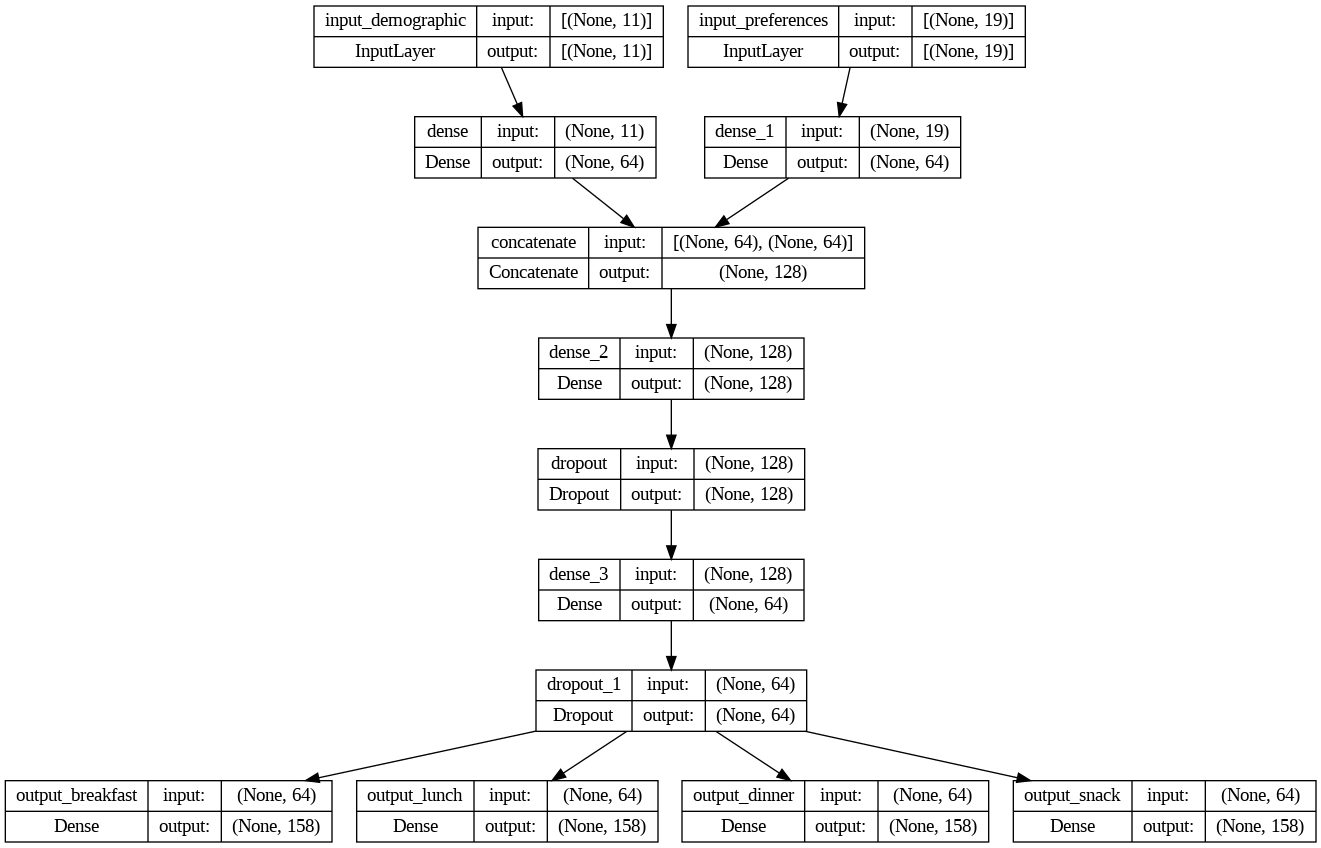

In [ ]:
# from tensorflow.keras.utils import plot_model
# # Plot the model
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)